1.001001001001001


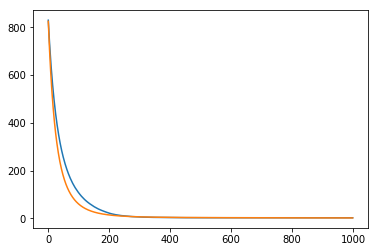

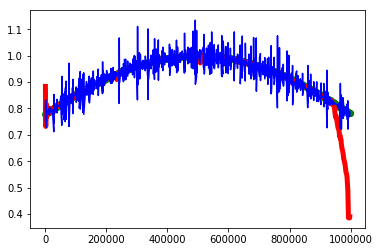

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


x = np.random.rand(1000)*1000
x.sort()
f = np.exp(-(x/1000.-0.5)**2)


N = 1000
tk = np.linspace(0,1000,N)
h = (tk[1]-tk[0])

reg = h#np.pi
print(h)
A1 = np.sinc(np.array([(x[:,np.newaxis])-tk[np.newaxis,:]])/h)[0]*reg
A2 = np.sinc(np.array([(x[:,np.newaxis])-tk[np.newaxis,:]])/h)[0]
#Maximum variations in the data. actually should be normalised by the gap between them
max_var = np.abs(np.max(f[1:]-f[:-1]))

mu = 0.01
S1 = np.zeros(N)
S2 = np.zeros(N)
r1 = []
r2 = []
for i in range(1000):
    S1+= mu*A1.T @ (f-A1@S1)
    #Total variation constraints, next 4 lines
    S_var = (S1[:-1]-S1[1:])
    sign = np.sign(S_var[np.abs(S_var) >3*max_var])
    loc = np.where(np.abs(S_var) >3*max_var)
    S1[loc] = S1[loc] - 2*max_var*sign
    r1.append(np.sum((f-A1@S1)**2))
    #Wrong interpolation
    S2+= mu*A2.T @ (f-A2@S2)
    r2.append(np.sum((f-A2@S2)**2))

plt.plot(np.array(r1))
plt.plot(np.array(r2))
plt.show()

plt.plot(x*1000,f, 'og')

plt.plot(x*1000,A1@S1,'r', linewidth = 5)
plt.plot(x*1000,A2@S2, 'b')
plt.show()